In [1]:
import numpy as np
import matplotlib.pyplot as plt


def load_input(file_stat, file_sys, file_cv):
    res, num_events_error = np.loadtxt(f"{file_stat}.txt", usecols=(9, 11), unpack=True, skiprows=2)
    covmat_sys = np.load(file_sys)
    sigmanu, sigmanub = np.loadtxt(f"{file_cv}.txt" , usecols=(3, 4), unpack=True, skiprows=1)
    return res, num_events_error, covmat_sys, sigmanu, sigmanub

def plot(cv, covmat_stat, covmat_sys):
    covmat_tot = covmat_stat + covmat_sys
    sigma_fluctuated_stat = np.random.multivariate_normal(cv, covmat_stat)
    sigma_fluctuated_stat_sys = np.random.multivariate_normal(cv, covmat_tot)

    x=np.arange(cv.size)

    plt.errorbar(x, cv, yerr=stat, fmt='.', label="not fluctuated")
    plt.plot(x, sigma_fluctuated_stat, marker='*', label="fluctuated, stat only", linestyle='None')
    plt.legend()
    plt.show()

    # now repeat includiong sys
    plt.errorbar(x, sigmanu, yerr=stat, fmt='.', label="not fluctuated")
    plt.plot(x, sigma_fluctuated_stat_sys, marker='*', label="fluctuated, stat + sys", linestyle='None')
    plt.legend()
    plt.show()
    

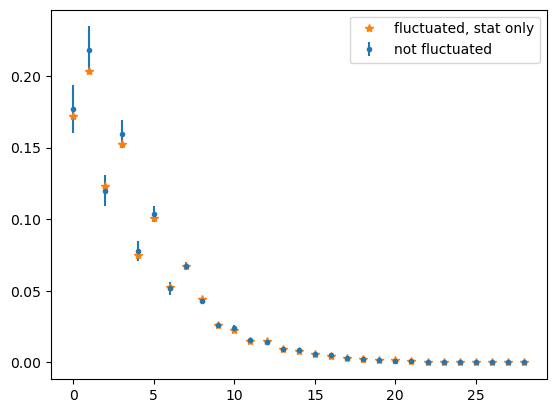

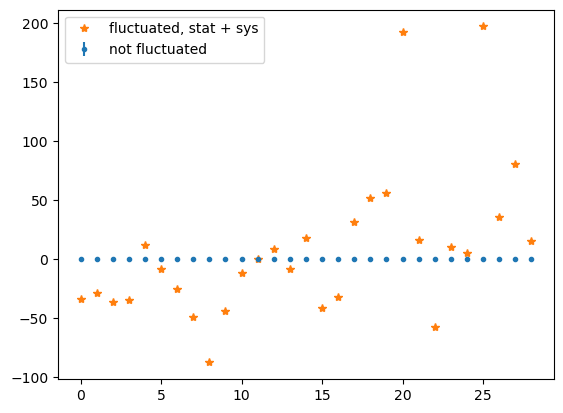

In [2]:
# FASERv2_charm_nu
res, num_events_error, covmat_sys, sigmanu, sigmanub = load_input("./stat_syst_uncertainties/clipped_nan_binned_sysevents_FASERv2_charm_nu",
                                                                 "./covariance_matrices/clipped_nan_covariance_FASERv2_charm_nu.npy",
                                                                 "./pineappl_tables/diffxsec-FASERv2_charm_nu-a1_NNPDF40_nnlo_as_01180_iso")
stat = 1.0 / num_events_error * sigmanu
covmat_stat = np.diag(stat**2)
plot(sigmanu, covmat_stat, covmat_sys)




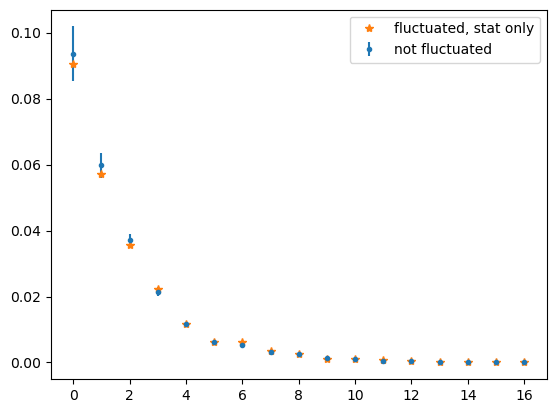

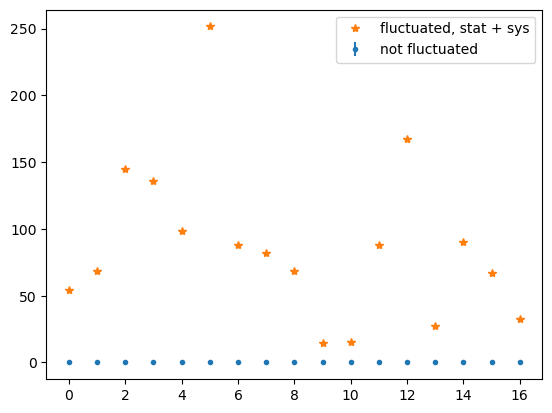

In [3]:
# FASERv2_charm_nu
res, num_events_error, covmat_sys, sigmanu, sigmanub = load_input("./stat_syst_uncertainties/clipped_nan_binned_sysevents_FASERv2_charm_nub",
                                                                 "./covariance_matrices/clipped_nan_covariance_FASERv2_charm_nub.npy",
                                                                 "./pineappl_tables/diffxsec-FASERv2_charm_nub-a1_NNPDF40_nnlo_as_01180_iso")
stat = 1.0 / num_events_error * sigmanub
covmat_stat = np.diag(stat**2)
plot(sigmanub, covmat_stat, covmat_sys)

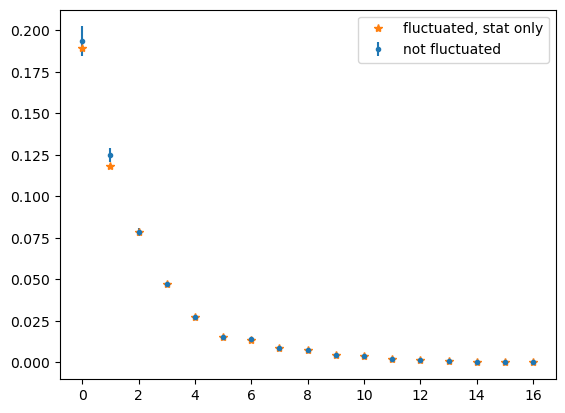

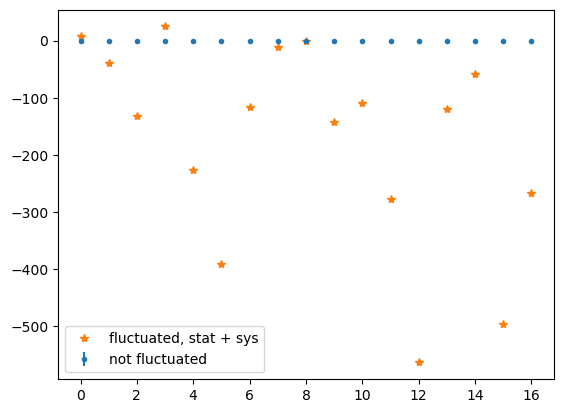

In [4]:
# FASERv2_charm_nochargediscrimination
res, num_events_error, covmat_sys, sigmanu, sigmanub = load_input("./stat_syst_uncertainties/clipped_nan_binned_sysevents_FASERv2_charm_nochargediscrimination",
                                                                 "./covariance_matrices/clipped_nan_covariance_FASERv2_charm_nochargediscrimination.npy",
                                                                 "./pineappl_tables/diffxsec-FASERv2_charm_nochargediscrimination-a1_NNPDF40_nnlo_as_01180_iso")
stat = 1.0 / num_events_error * (sigmanub+sigmanu)
covmat_stat = np.diag(stat**2)
plot(sigmanub+sigmanu, covmat_stat, covmat_sys)

In [5]:
# try to look at one of this sys covmat
covmat_sys_nu = np.load("./covariance_matrices/clipped_nan_covariance_FASERv2_charm_nu.npy")
# look at its egenvalues
lamb, u = np.linalg.eigh(covmat_sys_nu)
lamb

array([-1.12409885e-10, -6.19615218e-11, -1.94510995e-11, -1.62535474e-11,
       -1.11686273e-11, -4.84993274e-12, -3.69987972e-12, -2.51874957e-12,
       -1.75742876e-12, -9.80151200e-13, -8.70563402e-13, -2.81505273e-13,
       -2.18351969e-13, -1.21880715e-13, -1.47463624e-14,  5.00107195e-14,
        1.04029905e-13,  3.11238817e-13,  7.06654020e-13,  2.18606009e-12,
        4.40503861e-12,  6.68013108e-12,  8.19618032e-12,  1.08536989e-11,
        1.74078768e-11,  2.27481422e-11,  5.54868280e-11,  2.03886551e+04,
        9.32241227e+05])

In [ ]:
# they are all < 1e-10 a part from two which are order 1e4 and 1e6